# GIS introduction with geopandas (vector data)
based on scipy2018-geospatial

## goals of the tutorial
- the vector data and ESRI Shapefile
- the geodataframe in geopandas
- spatial projection

**based on the open data of:**
- [ISTAT](https://www.istat.it/it/archivio/222527) Italian National Institute of Statistic 

### requirements
- python knowledge
- pandas

### status 
*"The Earth isn't flat!!!"*

---

## install geopandas

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 297kB/s 
     |████████████████████████████████| 10.9MB 41.6MB/s 


---

In [ ]:
import os
import geopandas as gpd

# Let's start with GeoPandas

## Importing geospatial data

geopandas supports all the vector format offered by the project gdal/ogr

https://www.gdal.org/ogr_formats.html 

we will play with the geospatial data offered by ISTAT

https://www.istat.it/it/archivio/104317


### administrative borders
https://www.istat.it/it/archivio/222527

the big zip with everything - year 2020

http://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/Limiti01012020.zip

---
#### download and investigate the data

In [ ]:
if not os.path.exists('Limiti01012020'):
    # download the data
    import requests, zipfile, io
    zip_file_url = 'http://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/Limiti01012020.zip'
    #request the file
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    #unzip the file
    z.extractall()


Directory listening

In [ ]:
os.listdir(".")

In [ ]:
os.listdir('Limiti01012020')

Limiti01012020 => main folder with all the administrative borders of Italy in 2020
- ProvCM01012020 => folder with the provinces of Italy
- Reg01012020 => folder with the regions of Italy
- RipGeo01012020 => folder with the macro-regions of Italy
- Com01012020 => folder with the municipalities of Italy


#### Inspect the the macro regions


In [ ]:
#look to the data inside the macro regions
os.chdir('Limiti01012020')
os.chdir('RipGeo01012020')

In [ ]:
#show only the files
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

### ESRI Shapefile

this is a *ESRI Shapefile* (an old but common used format for the geospatial vector data)

The format is proprietary and some format specifications are public.
A "ESRI Shapefile" is a collection of different files with the same name and different extensions.

The public specifications are for the extensions:

| extension | meaning       | content of the file                                                  |
| --------- | ------------- | -------------------------------------------------------------------- |
| .shp      | shape         | the geometries (point, line, polygon)                                |
| .dbf      | database file | the attributes to associate with the geometries                      |
| .shx      | shape indices | the indices to join the geometries with the attributes               |
| .prj      | projection    | the rule to understand the kind of projection used by the geometries |

To manage the data are _necessary_ 3 files (*.shp, .shx, and .dbf*), however the *.prj* file is crucial to analyze the data togheter with other sources.

It's possibile find other kind of files

more informations are here

https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf


**read the file with gepandas**

In [ ]:
# read the file
macroregions=gpd.read_file('RipGeo01012020_WGS84.shp')

In [ ]:
type(macroregions)

### GeoDataframe

geopandas transform everything in a [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe).

a geodataframe is a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with the column "geometry" and special geospatial methods

In [ ]:
macroregions

Eg.
calculate the area of each geometry

In [ ]:
macroregions.geometry.area

**you can plot it**

In [ ]:
macroregions.plot(figsize=(10,10))

... and use the **classic methods of the pandas DataFrame.**

Eg.

extract a (geo)DataFrame by filter from an attribute

In [ ]:
isole = macroregions[macroregions['DEN_RIP'] == 'Isole']

In [ ]:
isole.plot()

in a esri shapefile the kind of geometry is always the same, but a geodataframe can accept mixed geometries for each row.

In [ ]:
macroregions.geom_type

in our case we have a MultiPolygon
the geometries allowed are:

|geometry|images|
|:--|--:|
|POINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/51px-SFA_Point.svg.png)|
|LINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SFA_LineString.svg/51px-SFA_LineString.svg.png)|
|LINEARRING|![](img/linering.png)|
|POLYGON|![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/51px-SFA_Polygon.svg.png)![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/SFA_Polygon_with_hole.svg/51px-SFA_Polygon_with_hole.svg.png)
|MULTIPOINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/51px-SFA_MultiPoint.svg.png) 
| MULITLINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/SFA_MultiLineString.svg/51px-SFA_MultiLineString.svg.png)| 
| MULTIPOLYGON |![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/SFA_MultiPolygon_with_hole.svg/51px-SFA_MultiPolygon_with_hole.svg.png)| 
| GEOMETRYCOLLECTION |![](img/geometrycollection.png) | 

note: table based on the wikipedia page [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)


#### and we are ready to look how are the geometries

In [ ]:
macroregions.geometry[0]

In [ ]:
macroregions.DEN_RIP[0]

In [ ]:
macroregions.geometry[1]

In [ ]:
macroregions.DEN_RIP[1]

In [ ]:
macroregions.geometry[2]

In [ ]:
macroregions.DEN_RIP[2]

In [ ]:
macroregions.geometry[3]

In [ ]:
macroregions.geometry[4]

In [ ]:
macroregions.DEN_RIP[4]

**the red color, in this case, means a mistake on the geometries!!!**
##### ... and we can check it!

In [ ]:
macroregions.geometry.is_valid

In [ ]:
macroregions.geometry[4].buffer(0)

#### Do you want know the centroid of each geometry?

In [ ]:
macroregions.geometry.centroid

the output of the geometries is in [well knowtext format (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

but ... how are expressed the coordinates??
we have to know the Coordinate Reference System (CRS)

## The true size
![](img/truesize.png)

https://thetruesize.com/

# SPATIAL PROJECTIONS

**CRS** = *Coordinate Reference System*

## How to convert in latitude/longitude?

In [ ]:
macroregions.crs

## EPSG?
European Petroleum Survey Group  (1986-2005)<br/>
[IOGP](https://www.iogp.org/about-us/) - International Association of Oil & Gas Producers (2005-now)

An important project is the [EPSG registry](http://www.epsg-registry.org/) - the dataset of geodetic parameters

http://epsg.io/32632

![](img/epsg32632.png)

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Usgs_map_traverse_mercator.PNG)

![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Utm-zones.jpg)

In [ ]:
macroregions.to_crs({'init': 'epsg:4326'}).geometry.centroid

In [ ]:
macroregions.to_crs({'init': 'epsg:4326'}).plot(figsize=(10,10))

In [ ]:
# in UTM 32N
macroregions.plot(figsize=(10,10))


### WGS84 VS ETRS89

|  [WGS84](https://epsg.io/4326)  |  [ETRS89](https://epsg.io/4258) |
|---|---|
|  ![WGS84.png](img/wgs84_coverage.png) |  ![ETRS89.png](img/etrs89_coverage.png) |

## exploring a .prj file

In [ ]:
f=open('RipGeo01012020_WGS84.prj','r')

In [ ]:
f.read()

... like here
http://epsg.io/32632.wkt

http://epsg.io/32632.prettywkt



<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

## save the geodataframe


In [34]:
macroregions.to_crs(epsg=4326).to_file('macro_regions.geojson',driver='GeoJSON')

<div class="alert alert-info" style="font-size:120%">
<b>OUTPUT FORMATS</b>: <br>

<ul>
  <li>the library *fiona* offers different kind of output formats
  </li>
</ul>
</div>

In [35]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'rw',
 'CSV': 'raw',
 'DGN': 'raw',
 'DXF': 'rw',
 'ESRI Shapefile': 'raw',
 'ESRIJSON': 'r',
 'GML': 'rw',
 'GPKG': 'raw',
 'GPSTrackMaker': 'rw',
 'GPX': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OGR_GMT': 'rw',
 'OGR_PDS': 'r',
 'OpenFileGDB': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

## download file from colab

In [36]:
from google.colab import files
files.download('macro_regions.geojson') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

... and visualize it on http://geojson.io
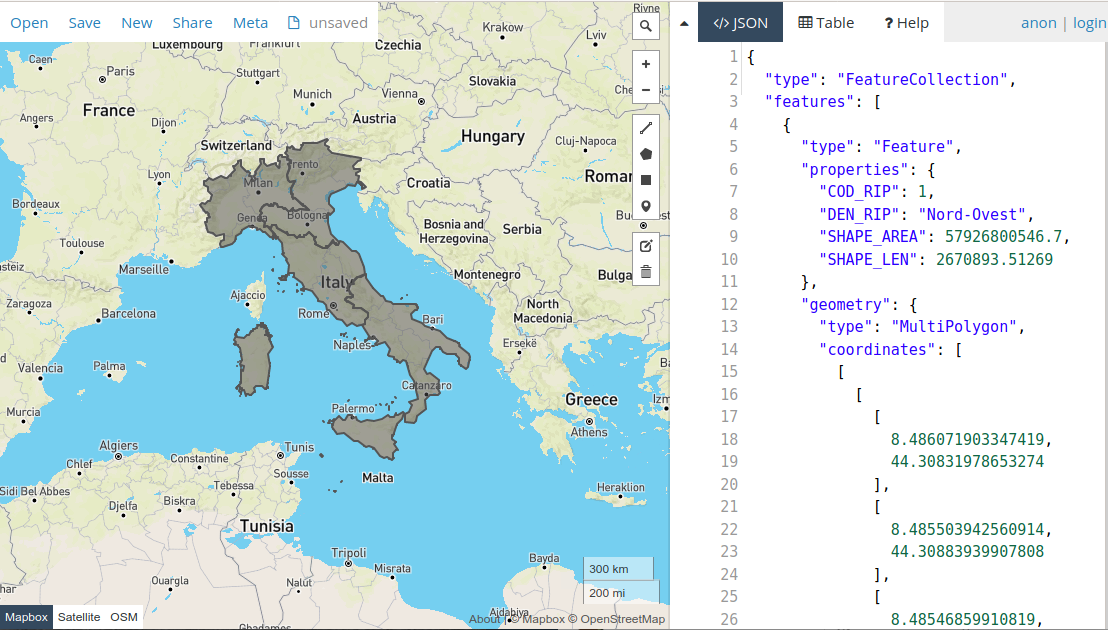


---
# Exercise
- load the shapefile of ISTAT with the information of the provinces
- filter it for an italian provice at your choice (eg. Trento)
- plot it
- identify the cities of the province selected with the biggest and smallest area
- extract all the centroids of the areas expressed in WGS84
- extract a rappresenative point for the area of a municipality in WGS84<br/>suggestion: *.representative_point()*
- save the points in a GeoJSON file
- calculate the distance on the geodentic between the municipaly with the big area and smallest area by using the centroid
---